# Planificación Comercial, Control y Administración: Modelo de onerosidad

Tras previa depuración en Excel, cargar los datos con los que se va a trabajar:
- Costes de generación
- Ventas industriales
- Ventas retail

Tener en cuenta que todos los precios están en €/MWh y los volúmenes en MWh

In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
# Cargar los datos con los que se va a trabajar
coste_generacion = pd.read_excel('costes_generacion_totales.xlsx')  
venta_industrial = pd.read_excel('precios_venta_industrial.xlsx')
venta_retail = pd.read_excel('precios_venta_retail.xlsx')

In [3]:
coste_generacion

,Mes,volumen_nuclear,coste_nuclear,volumen_hidro,coste_hidro,volumen_renovables,coste_renovables,volumen_combi,coste_combi
0,2023-07-01,300000,45.1,129000,83.0,358000,60.2,49000,42.6
1,2023-08-01,337000,72.5,141000,61.2,459000,62.1,76000,56.6
2,2023-09-01,498000,45.7,78000,151.4,411000,61.5,64000,36.7
3,2023-10-01,419000,47.4,67000,138.3,455000,57.6,0,38.5
4,2023-11-01,404000,67.3,196000,47.9,420000,44.4,0,60.0
5,2023-12-01,515000,66.6,300000,61.3,419000,61.8,0,36.7
6,2024-01-01,292000,62.9,245000,25.7,478000,37.6,11000,51.3
7,2024-02-01,370000,62.6,332000,29.7,544000,62.4,11000,55.1
8,2024-03-01,366000,62.3,387000,25.9,523000,42.5,12000,40.9
9,2024-04-01,245000,72.6,220000,65.6,290000,50.4,1000,50.8


In [4]:
venta_industrial

,MES,precio,volumen
0,2023-07-01,11.061613,0.069747
1,2023-07-01,11.199500,443.399654
2,2023-07-01,11.323838,2.785784
3,2023-07-01,11.587623,1069.767076
4,2023-07-01,11.655044,4.075215
...,...,...,...
123411,2024-06-01,283.711331,4.312847
123412,2024-06-01,292.049235,77.539575
123413,2024-06-01,293.886915,1.602851
123414,2024-06-01,307.134436,0.010972


In [5]:
venta_retail

,precio,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00
0,25.0,77.538720,76.120475,42.007294,32.347748,25.569961,24.230931,12.255006,3.328834,0.622916,0.000000,0.000000,0.000000
1,50.5,167.253842,118.543375,71.131872,68.417808,64.300058,29.001756,23.974538,12.561189,0.901443,0.000000,0.000000,0.000000
2,51.5,226.131598,176.700734,147.066446,164.649968,134.925246,82.862259,16.236562,16.002747,11.394577,5.389003,1.267214,0.918943
3,52.5,783.106320,238.364612,189.240796,122.837894,167.598788,103.381071,52.990719,87.666911,62.564674,38.772554,30.295119,42.808891
4,53.5,12595.761401,8832.957955,11163.484594,9293.900816,5862.186336,2577.592717,259.973705,137.438720,107.884385,92.419215,85.224480,78.261610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,356.5,9618.207858,7403.236665,9562.660649,8596.174423,7145.148547,6987.214717,5807.781362,4180.744976,88.462220,61.110165,99.691561,80.210330
308,357.5,4758.846111,3103.843323,5532.284895,3467.849489,4252.200379,2679.683262,1435.532528,929.592937,9.216215,0.000000,0.000000,0.000000
309,358.5,107.160411,57.053715,64.970121,51.511949,35.748336,26.123738,16.319738,3.778164,0.142613,0.000000,0.000000,0.000000
310,359.5,169.698338,102.147974,156.156927,154.358412,165.968854,133.045553,164.774103,124.165051,140.882121,0.000000,0.000000,0.000000


Breve procesamiento del DataFrame de venta retail para una mejor visualización de la estructura de los datos

In [6]:
# Obtener los nombres de las columnas de fechas (excluyendo la primera columna)
nombres_columnas_fechas = venta_retail.columns[1:]

# Obtener el mes y año de cada nombre de columna y crear nuevos nombres en formato "Abr 23, May 23, ..."
nuevos_nombres = [pd.to_datetime(nombre).strftime('%b %y') for nombre in nombres_columnas_fechas]

# Asignar los nuevos nombres de columna a las columnas de fechas del DataFrame
venta_retail.columns = ['precio'] + nuevos_nombres


In [7]:
venta_retail.head()

,precio,Jul 23,Aug 23,Sep 23,Oct 23,Nov 23,Dec 23,Jan 24,Feb 24,Mar 24,Apr 24,May 24,Jun 24
0,25.0,77.538720,76.120475,42.007294,32.347748,25.569961,24.230931,12.255006,3.328834,0.622916,0.000000,0.000000,0.000000
1,50.5,167.253842,118.543375,71.131872,68.417808,64.300058,29.001756,23.974538,12.561189,0.901443,0.000000,0.000000,0.000000
2,51.5,226.131598,176.700734,147.066446,164.649968,134.925246,82.862259,16.236562,16.002747,11.394577,5.389003,1.267214,0.918943
3,52.5,783.106320,238.364612,189.240796,122.837894,167.598788,103.381071,52.990719,87.666911,62.564674,38.772554,30.295119,42.808891
4,53.5,12595.761401,8832.957955,11163.484594,9293.900816,5862.186336,2577.592717,259.973705,137.438720,107.884385,92.419215,85.224480,78.261610


## Creación de gráficos

- Distribución de precios y cantidad vendida para venta retail

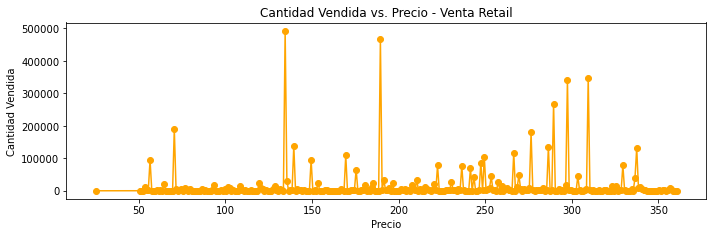

In [8]:
# Crear el gráfico de distribución de precios
plt.figure(figsize=(10, 6))


# Gráfico de cantidad vendida vs. precio del DataFrame venta_retail
plt.subplot(2, 1, 2)
plt.plot(venta_retail['precio'], venta_retail['Jul 23'], marker='o', color='orange')
plt.title('Cantidad Vendida vs. Precio - Venta Retail')
plt.xlabel('Precio')
plt.ylabel('Cantidad Vendida')

plt.tight_layout()
plt.show()

- Distribución de precios y cantidad vendida para venta industrial 

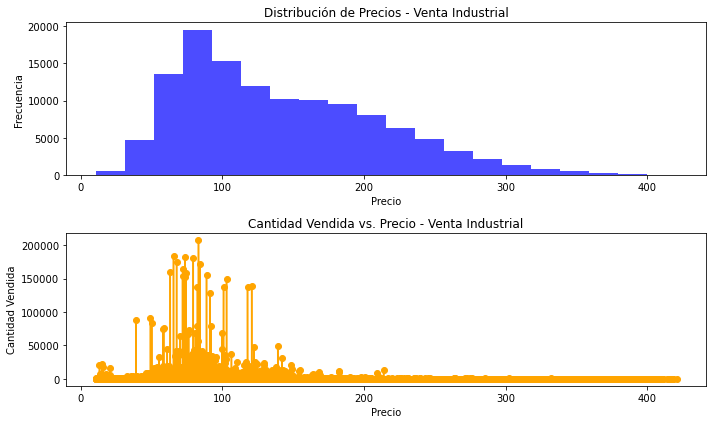

In [9]:
# Crear el gráfico de distribución de precios
plt.figure(figsize=(10, 6))

# Histograma de precios del DataFrame venta_industrial
plt.subplot(2, 1, 1)
plt.hist(venta_industrial['precio'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Precios - Venta Industrial')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Gráfico de cantidad vendida vs. precio del DataFrame venta_industrial
plt.subplot(2, 1, 2)
plt.plot(venta_industrial['precio'], venta_industrial['volumen'], marker='o', color='orange')
plt.title('Cantidad Vendida vs. Precio - Venta Industrial')
plt.xlabel('Precio')
plt.ylabel('Cantidad Vendida')

plt.tight_layout()
plt.show()

- Distribución de precios y cantidad vendida para el total de ventas

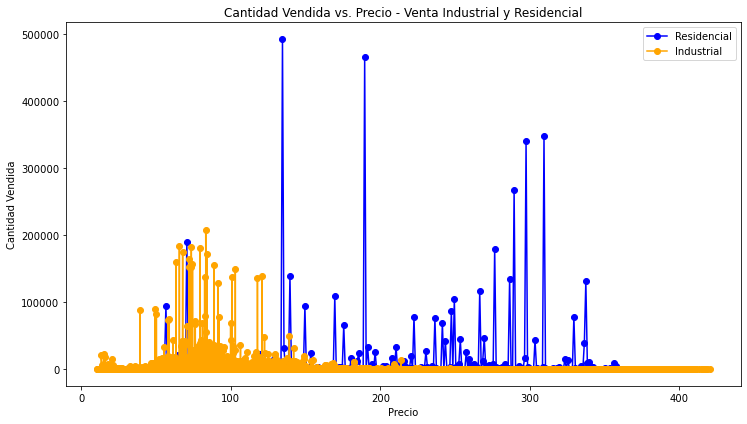

In [10]:
plt.figure(figsize=(20, 6))

# Gráfico de cantidad vendida vs. precio del total de ventas
plt.subplot(1, 2, 1)
plt.plot(venta_retail['precio'], venta_retail['Jul 23'], marker='o', color='blue', label='Residencial')
plt.plot(venta_industrial['precio'], venta_industrial['volumen'], marker='o', color='orange', label='Industrial')
plt.title('Cantidad Vendida vs. Precio - Venta Industrial y Residencial')
plt.xlabel('Precio')
plt.ylabel('Cantidad Vendida')
plt.legend()

plt.tight_layout()
plt.show()

La distribución del volumen de venta en función del precio de venta es muy dispar entre ambos archivos , por lo que es muy complicado elegir unos rangos de precio dinámicos que se ajusten bien a ambos. Por esta razón, se va a optar por trabajar con unos intervalos equitativos de 5€/MWh

## Procesamiento de ventas

Crear rangos de precios en el archivo de ventas industrial , agrupando los datos por meses y ordenándolos de menor a mayor precio 

In [11]:
venta_industrial.describe()

,precio,volumen
count,123416.000000,123416.000000
mean,141.293671,193.807637
std,70.170733,2339.279498
min,10.443817,0.000091
25%,84.585370,2.589358
50%,126.364753,12.682747
75%,188.383520,49.364226
max,420.574164,207776.761045


El precio mínimo de los datos de venta industrial es 10.44€/MWh, por lo que los intervalos creados comenzarán en 10€/MWh e irán aumentando en 5€/MWh, para ir en concordancia con el proceso que se seguirá para los datos de venta retail y, más adelante, poder concatenar ambos DataFrames

In [12]:
# Calcular el valor máximo en los precios
max_price = venta_industrial['precio'].max()

# Crear intervalos desde el valor mínimo hasta el máximo + 5 de 5 en 5
intervalos = range(10, int(max_price) + 5, 5)

# Agregar una columna al DataFrame que indique a qué rango pertenece cada precio
venta_industrial['Rango_Precio'] = pd.cut(venta_industrial['precio'], bins=intervalos, right=False)

# Convertir la columna de fecha a tipo datetime
venta_industrial['MES'] = pd.to_datetime(venta_industrial['MES'])

# Ordenar el DataFrame por la columna de meses en orden cronológico y luego por el rango de precio
venta_industrial = venta_industrial.sort_values(by=['MES', 'Rango_Precio'])

# Realizar la agregación para calcular el promedio del precio y la suma del volumen
industrial_rangos = venta_industrial.groupby(['MES', 'Rango_Precio']).agg({
    'precio': 'mean',
    'volumen': 'sum'
}).reset_index()


In [13]:
industrial_rangos

,MES,Rango_Precio,precio,volumen
0,2023-07-01,"[10, 15)",13.208874,6045.816117
1,2023-07-01,"[15, 20)",17.302245,38760.517078
2,2023-07-01,"[20, 25)",22.211753,4589.759293
3,2023-07-01,"[25, 30)",27.486343,3312.084203
4,2023-07-01,"[30, 35)",33.092617,10438.770905
...,...,...,...,...
979,2024-06-01,"[395, 400)",NaN,0.000000
980,2024-06-01,"[400, 405)",NaN,0.000000
981,2024-06-01,"[405, 410)",NaN,0.000000
982,2024-06-01,"[410, 415)",NaN,0.000000


Procesar los datos de venta retail de forma que se obtenga una tabla con la misma estructura que venta industrial. Además, crear rangos de precios agrupando los datosnuevamente por meses y ordenándolos de menor a mayor precio    

In [14]:
venta_retail.describe()

,precio,Jul 23,Aug 23,Sep 23,Oct 23,Nov 23,Dec 23,Jan 24,Feb 24,Mar 24,Apr 24,May 24,Jun 24
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,204.921474,15429.607214,14354.421975,13131.961026,11152.342533,8441.780108,6998.067037,4725.598118,2533.224514,133.980953,43.284310,29.664716,26.688204
std,90.357202,54721.734432,52302.723599,48610.400766,38624.638729,28258.594290,24079.320949,15985.360285,9080.123104,391.761316,305.248260,271.084936,265.140562
min,25.000000,37.336197,32.083741,13.615851,12.450103,9.335662,4.330354,1.305440,0.691694,0.000000,0.000000,0.000000,0.000000
25%,127.250000,247.775611,160.598280,96.505750,86.217704,65.044356,51.578253,35.721196,27.725278,4.303993,0.000000,0.000000,0.000000
50%,205.000000,1117.138073,1028.279607,904.978381,825.716772,756.412319,638.431043,292.703680,154.842292,22.896898,0.456774,0.210587,0.066128
75%,282.750000,4753.763340,4594.159649,4002.509508,3900.831018,3482.785548,2922.732914,2068.362312,1236.804185,81.745777,28.940658,14.401230,6.098722
max,360.500000,493385.374682,461032.713578,442560.510655,324905.207178,267557.420078,217375.600397,159778.425627,86195.955485,3885.430782,5294.293989,4776.003874,4664.441494


El precio mínimo de las ventas retail es de 25 , por lo que los rangos de precios comenzarán en esta cifra e irán aumentando de 5 en 5 para coincidir con los datos de venta industrial y poder combinar ambos

In [15]:

# Convertir las columnas de meses en filas y mantener solo las columnas relevantes
venta_retail_melted = venta_retail.melt(id_vars=['precio'], var_name='MES', value_name='volumen')

# Calcular el valor máximo en los precios
max_price = venta_retail_melted['precio'].max()

# Crear intervalos desde el valor mínimo hasta el máximo + 5 de 5 en 5
intervalos = range(25, int(max_price) + 5, 5)

# Agregar una columna para el rango de precio al que pertenece cada fila
venta_retail_melted['Rango_Precio'] = pd.cut(venta_retail_melted['precio'], bins=intervalos, right=False)

# Convertir la columna MES a tipo datetime
venta_retail_melted['MES'] = pd.to_datetime(venta_retail_melted['MES'], format='%b %y')

# Ordenar el DataFrame por la columna MES en orden cronológico y luego por Rango_Precio
venta_retail_melted = venta_retail_melted.sort_values(by=['MES', 'Rango_Precio'])

# Mantener todos los datos (precio y volumen) para cada rango de precio en cada mes
retail_rangos = venta_retail_melted.groupby(['MES', 'Rango_Precio']).apply(lambda x: x[['MES', 'Rango_Precio', 'precio', 'volumen']]).reset_index(drop=True)

retail_rangos = retail_rangos.groupby(['MES', 'Rango_Precio']).agg({
    'precio': 'mean',
    'volumen': 'sum'
    }).reset_index()

In [16]:
retail_rangos

,MES,Rango_Precio,precio,volumen
0,2023-07-01,"[25, 30)",25.0,77.538720
1,2023-07-01,"[30, 35)",NaN,0.000000
2,2023-07-01,"[35, 40)",NaN,0.000000
3,2023-07-01,"[40, 45)",NaN,0.000000
4,2023-07-01,"[45, 50)",NaN,0.000000
...,...,...,...,...
799,2024-06-01,"[335, 340)",337.5,1.140650
800,2024-06-01,"[340, 345)",342.5,30.687737
801,2024-06-01,"[345, 350)",347.5,55.939438
802,2024-06-01,"[350, 355)",352.5,109.489140


Una vez conseguida la misma estructura de datos en ambos DataFrames, agregar una columna distintiva a cada uno de forma que: 
  - I corresponde a datos de venta industrial 
  - R corresponde a datos de venta retail
  
Concatenar ambos DataFrames, agrupar los datos por mes y año y ordenarlos de menor a mayor rango de precio

In [17]:
industrial_rangos['Origen'] = 'I'
retail_rangos['Origen'] = 'R'

In [18]:
# Concatenar los DataFrames utilizando pd.concat y reseteando el índice
venta_total = pd.concat([industrial_rangos, retail_rangos], ignore_index=True)

# Ordenar el DataFrame combinado por las columnas MES, Rango_Precio, precio y Origen
venta_total = venta_total.sort_values(by=['MES', 'Rango_Precio', 'precio', 'Origen'])

# Reindexar el DataFrame
venta_total = venta_total.reset_index(drop=True)

In [19]:
venta_total

,MES,Rango_Precio,precio,volumen,Origen
0,2023-07-01,"[10, 15)",13.208874,6045.816117,I
1,2023-07-01,"[15, 20)",17.302245,38760.517078,I
2,2023-07-01,"[20, 25)",22.211753,4589.759293,I
3,2023-07-01,"[25, 30)",25.000000,77.538720,R
4,2023-07-01,"[25, 30)",27.486343,3312.084203,I
...,...,...,...,...,...
1783,2024-06-01,"[395, 400)",NaN,0.000000,I
1784,2024-06-01,"[400, 405)",NaN,0.000000,I
1785,2024-06-01,"[405, 410)",NaN,0.000000,I
1786,2024-06-01,"[410, 415)",NaN,0.000000,I


Añadir algunas columnas al DataFrame de ventas totales que cobrarán relevancia más adelante para el modelo de onerosidad: 

- Venta (€) : Precio (€/MWh) x Volumen (MWh)
- Coste Total (€) : Coste Medio (€/MWh) x Volumen Asignado (MWh)
- Margen Unitario (€/MWh) : Precio (€/MWh) - Coste Medio (€/MWh)
- Margen Total (€) : Venta (€) - Coste Total (€)

In [20]:
venta_total["Venta"] = ""
venta_total["Coste Total"] = ""
venta_total["Margen unitario"] = ""
venta_total["Margen total"] = ""

In [21]:
venta_total

,MES,Rango_Precio,precio,volumen,Origen,Venta,Coste Total,Margen unitario,Margen total
0,2023-07-01,"[10, 15)",13.208874,6045.816117,I,,,,
1,2023-07-01,"[15, 20)",17.302245,38760.517078,I,,,,
2,2023-07-01,"[20, 25)",22.211753,4589.759293,I,,,,
3,2023-07-01,"[25, 30)",25.000000,77.538720,R,,,,
4,2023-07-01,"[25, 30)",27.486343,3312.084203,I,,,,
...,...,...,...,...,...,...,...,...,...
1783,2024-06-01,"[395, 400)",NaN,0.000000,I,,,,
1784,2024-06-01,"[400, 405)",NaN,0.000000,I,,,,
1785,2024-06-01,"[405, 410)",NaN,0.000000,I,,,,
1786,2024-06-01,"[410, 415)",NaN,0.000000,I,,,,


Crear un diccionario en el cual cada clave corresponde a cada uno de los meses

In [22]:

# Convertir la columna "MES" a tipo datetime.datetime
venta_total["MES"] = pd.to_datetime(venta_total["MES"])

# Crear un diccionario para almacenar los DataFrames mensuales
venta_mensual = {}

# Iterar a través de los meses únicos y crear DataFrames mensuales
for date in venta_total["MES"].dt.to_period("M").unique():
    year = date.year
    month = date.month
    df_name = f"{year}_{month:02d}"  # Crear el nombre del DataFrame
    df_month = venta_total[
        (venta_total["MES"].dt.year == year) & (venta_total["MES"].dt.month == month)
    ].copy()  # Filtrar por mes
    venta_mensual[df_name] = df_month


In [23]:
type(venta_mensual)

dict

In [24]:
venta_mensual.keys()

dict_keys(['2023_07', '2023_08', '2023_09', '2023_10', '2023_11', '2023_12', '2024_01', '2024_02', '2024_03', '2024_04', '2024_05', '2024_06'])

In [25]:
venta_mensual['2023_07']

,MES,Rango_Precio,precio,volumen,Origen,Venta,Coste Total,Margen unitario,Margen total
0,2023-07-01,"[10, 15)",13.208874,6045.816117,I,,,,
1,2023-07-01,"[15, 20)",17.302245,38760.517078,I,,,,
2,2023-07-01,"[20, 25)",22.211753,4589.759293,I,,,,
3,2023-07-01,"[25, 30)",25.000000,77.538720,R,,,,
4,2023-07-01,"[25, 30)",27.486343,3312.084203,I,,,,
...,...,...,...,...,...,...,...,...,...
144,2023-07-01,"[395, 400)",397.560363,3.787721,I,,,,
145,2023-07-01,"[400, 405)",401.727642,23.264327,I,,,,
146,2023-07-01,"[405, 410)",409.279706,16.447313,I,,,,
147,2023-07-01,"[410, 415)",NaN,0.000000,I,,,,


## Procesamiento de costes

Crear un diccionario en el cual cada clave corresponde a cada uno de los meses

In [26]:
# Convertir la columna "Mes" a tipo datetime.datetime
coste_generacion["Mes"] = pd.to_datetime(coste_generacion["Mes"])

# Crear un diccionario para almacenar los DataFrames mensuales
coste_generacion_mensual = {}

# Iterar a través de los meses únicos y crear DataFrames mensuales
for date in coste_generacion["Mes"].dt.to_period("M").unique():
    year = date.year
    month = date.month
    df_name = f"{year}_{month:02d}"  # Crear el nombre del DataFrame
    print(f"Generando DataFrame: {df_name}")  # Agregar esta línea para verificar la clave generada
    df_month = coste_generacion[
        (coste_generacion["Mes"].dt.year == year) & (coste_generacion["Mes"].dt.month == month)
    ].copy()  # Filtrar por mes
    print(df_month)  # Agregar esta línea para imprimir el DataFrame mensual
    coste_generacion_mensual[df_name] = df_month

Generando DataFrame: 2023_07
         Mes  volumen_nuclear  coste_nuclear  volumen_hidro  coste_hidro  \
0 2023-07-01           300000           45.1         129000         83.0   

   volumen_renovables  coste_renovables  volumen_combi  coste_combi  
0              358000              60.2          49000         42.6  
Generando DataFrame: 2023_08
         Mes  volumen_nuclear  coste_nuclear  volumen_hidro  coste_hidro  \
1 2023-08-01           337000           72.5         141000         61.2   

   volumen_renovables  coste_renovables  volumen_combi  coste_combi  
1              459000              62.1          76000         56.6  
Generando DataFrame: 2023_09
         Mes  volumen_nuclear  coste_nuclear  volumen_hidro  coste_hidro  \
2 2023-09-01           498000           45.7          78000        151.4   

   volumen_renovables  coste_renovables  volumen_combi  coste_combi  
2              411000              61.5          64000         36.7  
Generando DataFrame: 2023_10
     

In [27]:
coste_generacion_mensual["2023_07"]

,Mes,volumen_nuclear,coste_nuclear,volumen_hidro,coste_hidro,volumen_renovables,coste_renovables,volumen_combi,coste_combi
0,2023-07-01,300000,45.1,129000,83.0,358000,60.2,49000,42.6


Modificar la estrutura de los datos de forma que los índices correspondan a los tipos de energía , las columnas correspondan al precio y al volumen de cada una , y se ordenen en funcion de menor a mayor precio para cada mes

In [28]:
# Definir los nombres de las columnas de precio y volumen para cada tipo de energía
columnas_precio = ["coste_combi", "coste_hidro", "coste_renovables", "coste_nuclear"]
columnas_volumen = ["volumen_combi", "volumen_hidro", "volumen_renovables", "volumen_nuclear"]

# Recorrer todos los DataFrames mensuales y reorganizar los datos
for year in range(2023, 2025):
    for month in range(1, 13):
        df_key = f"{year}_{month:02d}"
        if df_key in coste_generacion_mensual:
            df_mensual = coste_generacion_mensual[df_key]

            df_reorganizado = pd.DataFrame(columns=["precio", "volumen"], index=["combi", "hidro", "renovables", "nuclear"])

            for tipo_energia, col_precio, col_volumen in zip(["combi", "hidro", "renovables", "nuclear"], columnas_precio, columnas_volumen):
                if col_precio in df_mensual.columns and col_volumen in df_mensual.columns:
                    precio_valor = df_mensual[col_precio].iloc[0]
                    volumen_valor = df_mensual[col_volumen].iloc[0]
                    df_reorganizado.loc[tipo_energia] = [precio_valor, volumen_valor]

            # Ordenar el DataFrame reorganizado por el precio de menor a mayor
            df_reorganizado = df_reorganizado.sort_values(by="precio")

            # Guardar el DataFrame reorganizado en un nuevo nombre de columna en el DataFrame original
            new_column_name = f"{df_key}"
            coste_generacion_mensual[new_column_name] = df_reorganizado


In [29]:
type(coste_generacion_mensual)

dict

In [30]:
coste_generacion_mensual.keys()

dict_keys(['2023_07', '2023_08', '2023_09', '2023_10', '2023_11', '2023_12', '2024_01', '2024_02', '2024_03', '2024_04', '2024_05', '2024_06'])

In [31]:
coste_generacion_mensual["2023_07"]

,precio,volumen
combi,42.6,49000
nuclear,45.1,300000
renovables,60.2,358000
hidro,83.0,129000


In [32]:
coste_generacion_mensual["2024_01"]

,precio,volumen
hidro,25.7,245000
renovables,37.6,478000
combi,51.3,11000
nuclear,62.9,292000


## Asignación de costes por rango de precio

Crear una copia de los datos de costes de generación , para no sobreescribir los datos originales

In [33]:
coste_generacion_mensual_v2 = copy.deepcopy(coste_generacion_mensual)

In [34]:
coste_generacion_mensual_v2["2023_07"]

,precio,volumen
combi,42.6,49000
nuclear,45.1,300000
renovables,60.2,358000
hidro,83.0,129000


In [35]:
for mes in venta_mensual.keys():
    print(mes)
    
    venta_mensual[mes]["volumen_asignado"] = 0
    venta_mensual[mes]["Coste medio"] = 0

    fila_coste = 0
    for venta in venta_mensual[mes]["volumen"].index.values:
        volumen = venta_mensual[mes]["volumen"][venta]
        coste_medio = 0
        volumen_total = volumen
        fila_coste = fila_coste
        while volumen > 0 and fila_coste < len(coste_generacion_mensual_v2[mes]):

            if volumen <= coste_generacion_mensual_v2[mes].iloc[fila_coste]['volumen']:
                coste_generacion_mensual_v2[mes].iloc[fila_coste]['volumen'] -= volumen
                venta_mensual[mes].loc[venta, "volumen_asignado"] += volumen
                coste_medio += volumen / volumen_total * coste_generacion_mensual_v2[mes].iloc[fila_coste]['precio'] 
                volumen = 0 

            else:
                volumen_asignado = coste_generacion_mensual_v2[mes].iloc[fila_coste]['volumen']
                coste_generacion_mensual_v2[mes].iloc[fila_coste]['volumen'] = 0
                venta_mensual[mes].loc[venta, "volumen_asignado"] += volumen_asignado
                volumen -= volumen_asignado
                coste_medio += volumen_asignado / volumen_total * coste_generacion_mensual_v2[mes].iloc[fila_coste]['precio'] 
                fila_coste += 1   
            if volumen > 0 and fila_coste == len(coste_generacion_mensual_v2[mes]):
                # Asignar el coste medio ponderado del volumen restante con el último precio
                coste_medio += volumen / volumen_total * coste_generacion_mensual_v2[mes].iloc[-1]['precio']
            venta_mensual[mes].loc[venta, "Coste medio"] = coste_medio

2023_07
2023_08
2023_09
2023_10
2023_11
2023_12
2024_01
2024_02
2024_03
2024_04
2024_05
2024_06


In [36]:
venta_mensual["2023_08"].head(25)

,MES,Rango_Precio,precio,volumen,Origen,Venta,Coste Total,Margen unitario,Margen total,volumen_asignado,Coste medio
149,2023-08-01,"[10, 15)",13.031470,405.670156,I,,,,,405.670156,56.600000
150,2023-08-01,"[15, 20)",17.460059,27241.453858,I,,,,,27241.453858,56.600000
151,2023-08-01,"[20, 25)",22.251894,19130.741890,I,,,,,19130.741890,56.600000
152,2023-08-01,"[25, 30)",25.000000,76.120475,R,,,,,76.120475,56.600000
153,2023-08-01,"[25, 30)",27.503019,4393.036633,I,,,,,4393.036633,56.600000
154,2023-08-01,"[30, 35)",32.994857,7301.474626,I,,,,,7301.474626,56.600000
155,2023-08-01,"[30, 35)",NaN,0.000000,R,,,,,0.000000,0.000000
156,2023-08-01,"[35, 40)",37.634147,102686.579540,I,,,,,102686.579540,60.418234
157,2023-08-01,"[35, 40)",NaN,0.000000,R,,,,,0.000000,0.000000
158,2023-08-01,"[40, 45)",42.568438,16825.160797,I,,,,,16825.160797,61.200000


Comprobar que se han asignado correctamente los volúmenes de energías de los datos copiados de costes de generación, mientras que los originales quedan inalterados

In [37]:
coste_generacion_mensual_v2["2023_07"]

,precio,volumen
combi,42.6,0
nuclear,45.1,0
renovables,60.2,0
hidro,83.0,0


In [38]:
coste_generacion_mensual["2023_07"]

,precio,volumen
combi,42.6,49000
nuclear,45.1,300000
renovables,60.2,358000
hidro,83.0,129000


Comprobar para un mes que la suma de volúmenes asignados corresponde a la suma del volumen total por asignar

In [39]:
suma_total = venta_mensual["2023_07"]["volumen_asignado"].sum()
print("Suma total de volumen_asignado:", suma_total)

Suma total de volumen_asignado: 835999.9999999998


In [40]:
suma_total = coste_generacion_mensual["2023_07"]["volumen"].sum()
print("Suma total de volumen por asignar:", suma_total)

Suma total de volumen por asignar: 836000


In [41]:
for mes, mes_data in venta_mensual.items():
    volumen_asignado = mes_data["volumen_asignado"]
    coste_medio = mes_data["Coste medio"]
    mes_data["Coste Total"] = [v * c for v, c in zip(volumen_asignado, coste_medio)]


In [42]:
for mes, mes_data in venta_mensual.items():
    precios = mes_data["precio"]
    costes_medios = mes_data["Coste medio"]
    
    # Calcular el margen unitario solo si el Coste medio es mayor que 0
    margen_unitario = [(p - c) if c > 0 else None for p, c in zip(precios, costes_medios)]
    
    mes_data["Margen unitario"] = margen_unitario

In [43]:
# Recorrer cada mes en el DataFrame
for month, data in venta_mensual.items():
    # Realizar la multiplicación y guardar los resultados en la columna 'Venta'
    data['Venta'] = [precio * volumen if volumen_asignado > 0 else 0 for precio, volumen, volumen_asignado in zip(data['precio'], data['volumen'], data['volumen_asignado'])]

# Imprimir el DataFrame actualizado para un mes (por ejemplo, julio de 2023)
print(venta_mensual['2023_07'])

           MES Rango_Precio      precio       volumen Origen          Venta  \
0   2023-07-01     [10, 15)   13.208874   6045.816117      I   79858.424366   
1   2023-07-01     [15, 20)   17.302245  38760.517078      I  670643.951443   
2   2023-07-01     [20, 25)   22.211753   4589.759293      I  101946.599406   
3   2023-07-01     [25, 30)   25.000000     77.538720      R    1938.467999   
4   2023-07-01     [25, 30)   27.486343   3312.084203      I   91037.081840   
..         ...          ...         ...           ...    ...            ...   
144 2023-07-01   [395, 400)  397.560363      3.787721      I       0.000000   
145 2023-07-01   [400, 405)  401.727642     23.264327      I       0.000000   
146 2023-07-01   [405, 410)  409.279706     16.447313      I       0.000000   
147 2023-07-01   [410, 415)         NaN      0.000000      I       0.000000   
148 2023-07-01   [415, 420)  415.423771      5.210364      I       0.000000   

      Coste Total  Margen unitario Margen total  vo

In [44]:
for mes, mes_data in venta_mensual.items():
    ventas = mes_data["Venta"]
    costes_totales = mes_data["Coste Total"]
    
    # Calcular el margen total restando Venta menos Coste Total si Coste Total > 0
    margen_total = [v - c if v is not None and c is not None and c > 0 else None for v, c in zip(ventas, costes_totales)]
    
    mes_data["Margen total"] = margen_total



In [45]:
# Crear una lista de DataFrames a partir de los datos
data_frames = [pd.DataFrame(datos) for datos in venta_mensual.values()]

# Concatenar los DataFrames en un solo DataFrame
df_combined = pd.concat(data_frames, ignore_index=True)

# Crear un archivo Excel
nombre_archivo = "ventas_mensuales_en_csv.csv"
df_combined.to_csv(nombre_archivo, index=False)

print(f"Archivo {nombre_archivo} creado exitosamente.")

Archivo ventas_mensuales_en_csv.csv creado exitosamente.
